<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2. Ames Housing Data


Submitted by: Goh Chun Shan
GA DSI-7

--- 

## Contents:

## [1. EDA](#Step-1.-EDA)
- **Read the data dictionary.**
- Determine _what_ missing values mean.
- Figure out what each categorical value represents.
- Identify outliers.
- Consider whether discrete values are better represented as categorical or continuous. (Are relationships to the target linear?)

## [2. Data Cleaning](#Step-2.-Data-Cleaning)
- Decide how to impute null values.
- Decide how to handle outliers.
- Do you want to combine any features?
- Do you want to have interaction terms?
- Do you want to manually drop collinear features?

## [3. Exploratory Visualisations](#Step-3.-Exploratory-Visualisations)
- Look at distributions.
- Look at correlations.
- Look at relationships to target (scatter plots for continuous, box plots for categorical).

## [4. Pre-processing](#Step-4.-Pre-processing)
- One-hot encode categorical variables.
- Train/test split your data.
- Scale your data.
- Consider using automated feature selection.

## [5. Modelling](#Step-5.-Modelling)
- **Establish your baseline score.**
- Fit linear regression. Look at your coefficients. Are any of them wildly overblown?
- Fit lasso/ridge/elastic net with default parameters.
- Go back and remove features that might be causing issues in your models.
- Tune hyperparameters.
- **Identify a production model.** (This does not have to be your best performing Kaggle model, but rather the model that best answers your problem statement.)
- Refine and interpret your production model.

## [6. Inferential Visualizations](#Step-6.-Inferential-Visualizations)
- Look at feature loadings.
- Look at how accurate your predictions are.
- Is there a pattern to your errors? Consider reworking your model to address this.

## [7. Conclusions and Recommendations](#Step-7.-Conclusions-and-Recommendations)
- Which features appear to add the most value to a home?
- Which features hurt the value of a home the most?
- What are things that homeowners could improve in their homes to increase the value?
- What neighborhoods seem like they might be a good investment?
- Do you feel that this model will generalize to other cities? How could you revise your model to make it more universal OR what date would you need from another city to make a comparable model?
--- 

## Problem statements:
1. What features influence the sale price of a house most significantly?
2. To predict the expected sale price of a house given a set of features.


# Step 1. EDA

The [data description](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt) is found here.

Variable Descriptors:

The data has 82 columns which include 23 nominal, 23 ordinal, 14 discrete, and 20 continuous variables (and 2 additional observation identifiers).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
df_train = pd.read_csv(f'datasets/train.csv')
df_test = pd.read_csv(f'datasets/test.csv')

In [3]:
df_train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


There are 81 columns in the dataset. Excluding the Y variable 'SalePrice' which the model is trying to predict, and the identifier 'Id', and 'PID' Parcel Identification Number which do not have numerical significance, there are a total of 78 data columns. We wish to sort these data into numerical and categorical variables first.

In [4]:
df_train.shape

(2051, 81)

In [5]:
df_test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [6]:
df_test.shape
# Only one column missing, which is 'SalePrice' that we wish to predict.

(878, 80)

In [7]:
too_many_null_values = df_train.isnull().sum()
too_many_null_values = too_many_null_values[too_many_null_values>1000]
too_many_null_values

Alley           1911
Pool QC         2042
Fence           1651
Misc Feature    1986
dtype: int64

Ordinal data should be expressed as numerical and not categorical.

In [8]:
#subset out the ordinal data listed from data dictionary
# Ordinal data means : either rating 1 to 10, or rating Excellent to Poor

#Total 23 ordinal variables
ordinal_cols = ['Lot Shape', 'Utilities', 'Land Slope', 'Exter Qual', 'Exter Cond', 'Bsmt Qual',
                'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating QC','Electrical', 
                  'Kitchen Qual', 'Functional', 'Fireplace Qu', 'Garage Finish', 'Garage Qual', 'Garage Cond', 'Paved Drive',
                'Pool QC', 'Fence' ]

In [9]:
ordinal_to_num_dict = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa' : 2, 'Po': 1, 'NA':0, 
                       #Exter Qual, Exter Cond, Bsmt Qual, Bsmt Cond, HeatingQC, KitchenQual, FireplaceQu, Garage Qual, 
                       #Garage Cond, Pool QC
                       'Av':3, 'Mn': 2, 'No': 1, #Bsmt Exposure
                       'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, #BsmtFin Type 1, BsmtFin Type 2
                       'Fin': 3, 'RFn': 2, #Garage Finish
                      'Typ':8, 'Min1':7, 'Min2':6, 'Mod': 5, 'Maj1': 4, 'Maj2': 3, 'Sev': 2, 'Sal': 1, #Functional
                       'Reg': 4, 'IR1': 3, 'IR2': 2, 'IR3': 1 , #Lot Shape
                       'AllPub': 4, 'NoSewr': 3, 'NoSeWa': 2, 'ELO': 1, #Utilities 
                       'Gtl': 3, 'Mod': 2, 'Sev': 1, #LandSlope
                      'GdPrv':4, 'MnPrv':3, 'GdWo':2, 'MnWw':1, 'NA': 0, #Fence
                       'SBrkr': 5, 'FuseA': 4, 'FuseF': 3, 'FuseP': 2, 'Mix': 1, #Electrical
                       'Y':3, 'P':2, 'N':1 , np.nan:0  #Paved Drive
                      }


In [10]:
for x in ordinal_cols:
    df_train[x] = df_train[x].apply(lambda i: int(ordinal_to_num_dict[i]))
    df_test[x] = df_test[x].apply(lambda i: int(ordinal_to_num_dict[i]))

In [11]:
#Change 'MS SubClass' variable to string type
df_train['MS SubClass'] = df_train['MS SubClass'].apply(lambda x:str(x))
df_test['MS SubClass'] = df_test['MS SubClass'].apply(lambda x:str(x))

Separate the numerical and categorical columns.

In [12]:
cols = df_train.columns
num_cols = df_train._get_numeric_data().columns #includes int or float types
num_cols = list(num_cols)

From numerical columns, drop 'Id', 'PID' and 'SalePrice'.

In [13]:
num_cols = list(set(num_cols)- set(['Id', 'PID', 'SalePrice']))

Extract the categorical columns.

In [14]:
cat_cols = list(set(cols) - set(num_cols) - set(['Id','PID','SalePrice']))

In [112]:
print(f'\n Total no. of columns with numerical data: {len(num_cols)} \n Total no. of columns with non-numerical data: {len(cat_cols)}')


 Total no. of columns with numerical data: 48 
 Total no. of columns with non-numerical data: 20


In [114]:
num_cols

['Enclosed Porch',
 'BsmtFin Type 2',
 'Mo Sold',
 'Mas Vnr Area',
 'Overall Qual',
 'Bsmt Unf SF',
 'Bsmt Exposure',
 'Kitchen AbvGr',
 'Lot Area',
 'Year Built',
 'Electrical',
 'Functional',
 'Half Bath',
 'Bedroom AbvGr',
 'Full Bath',
 'Paved Drive',
 'Screen Porch',
 'Lot Frontage',
 'BsmtFin Type 1',
 'Garage Finish',
 'Misc Val',
 'Pool Area',
 'Gr Liv Area',
 'Bsmt Qual',
 'Garage Qual',
 'BsmtFin SF 2',
 'Kitchen Qual',
 'Yr Sold',
 'Fireplaces',
 'BsmtFin SF 1',
 'Year Remod/Add',
 'Exter Qual',
 'Bsmt Full Bath',
 '3Ssn Porch',
 'Lot Shape',
 'Overall Cond',
 'Heating QC',
 'Open Porch SF',
 'Land Slope',
 'Garage Cond',
 'Utilities',
 'Exter Cond',
 'Bsmt Half Bath',
 'Bsmt Cond',
 'Wood Deck SF',
 'Low Qual Fin SF',
 'Garage Cars',
 'Total SqFeet']

In [115]:
cat_cols

['Roof Style',
 'Street',
 'MS SubClass',
 'Foundation',
 'Sale Type',
 'Heating',
 'Exterior 1st',
 'Neighborhood',
 'Central Air',
 'Bldg Type',
 'Garage Type',
 'Land Contour',
 'Condition 2',
 'Mas Vnr Type',
 'House Style',
 'Roof Matl',
 'Condition 1',
 'Exterior 2nd',
 'MS Zoning',
 'Lot Config']

### 1.1 Sale Price (Y variable)

In [16]:
df_train['SalePrice'].isnull().sum()

0

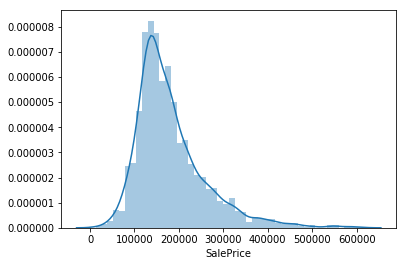

In [17]:
sns.distplot(df_train['SalePrice'], hist=True, kde=True) 
             #bins=int(15), color = 'darkblue', 
             #hist_kws={'edgecolor':'black'},
            # kde_kws={'linewidth': 2})
            
#should log this as there is a skew. 

There are no null values for SalePrice in the training dataset. From the distribution, it looks normally distributed with a slight left skew. We log transform this below.

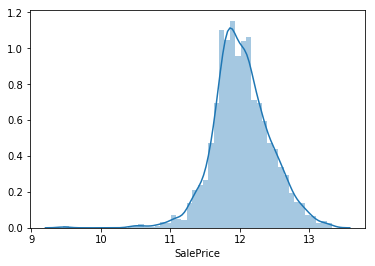

In [18]:
Y_log = np.log1p(df_train['SalePrice'])
graph = sns.distplot(Y_log)

#Even though there is a slight skew, chose not to log the Y variable as it will be difficult to interpret the data variables.

### 1.2 Numerical Variables

We wish to look at the numerical variables (must be type _int_ or _float_ and not nominal or ordinal data)

Next, plot some graphs of relationships between 'SalePrice' (y variable) and other numerical variables.

In [19]:
num_cols

['Enclosed Porch',
 'BsmtFin Type 2',
 'Mo Sold',
 'Mas Vnr Area',
 'Overall Qual',
 'Bsmt Unf SF',
 '1st Flr SF',
 'Bsmt Exposure',
 'Kitchen AbvGr',
 'Total Bsmt SF',
 'Pool QC',
 'Fence',
 'Lot Area',
 'Year Built',
 'Electrical',
 'Functional',
 'Half Bath',
 'Bedroom AbvGr',
 'Garage Yr Blt',
 'Full Bath',
 'Paved Drive',
 'Screen Porch',
 'Lot Frontage',
 'BsmtFin Type 1',
 'Garage Finish',
 'Misc Val',
 'Garage Cars',
 'Garage Area',
 'Gr Liv Area',
 'Bsmt Qual',
 'Garage Qual',
 'BsmtFin SF 2',
 'Pool Area',
 'Kitchen Qual',
 'Yr Sold',
 'Fireplaces',
 'Year Remod/Add',
 'BsmtFin SF 1',
 'TotRms AbvGrd',
 'Exter Qual',
 'Bsmt Full Bath',
 '3Ssn Porch',
 'Overall Cond',
 'Heating QC',
 'Open Porch SF',
 'Land Slope',
 'Garage Cond',
 'Utilities',
 'Exter Cond',
 'Bsmt Half Bath',
 'Bsmt Cond',
 '2nd Flr SF',
 'Wood Deck SF',
 'Low Qual Fin SF',
 'Lot Shape',
 'Fireplace Qu']

In [20]:
df_train[num_cols].describe()

,Enclosed Porch,BsmtFin Type 2,Mo Sold,Mas Vnr Area,Overall Qual,Bsmt Unf SF,1st Flr SF,Bsmt Exposure,Kitchen AbvGr,Total Bsmt SF,...,Garage Cond,Utilities,Exter Cond,Bsmt Half Bath,Bsmt Cond,2nd Flr SF,Wood Deck SF,Low Qual Fin SF,Lot Shape,Fireplace Qu
count,2051.000000,2051.000000,2051.000000,2029.000000,2051.000000,2050.000000,2051.000000,2051.000000,2051.000000,2050.000000,...,2051.000000,2051.000000,2051.000000,2049.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,22.571916,1.274500,6.219893,99.695909,6.112140,567.728293,1164.488055,1.628961,1.042906,1057.987805,...,2.810336,3.998537,3.085812,0.063446,2.929303,329.329108,93.833740,5.512921,3.595807,1.763530
std,59.845110,0.949571,2.744736,174.963129,1.426271,444.954786,396.446923,1.079440,0.209790,449.410704,...,0.716094,0.049365,0.372792,0.251705,0.572009,425.671046,128.549416,51.068870,0.566514,1.807074
min,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,334.000000,0.000000,0.000000,0.000000,...,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,1.000000,4.000000,0.000000,5.000000,220.000000,879.500000,1.000000,1.000000,793.000000,...,3.000000,4.000000,3.000000,0.000000,3.000000,0.000000,0.000000,0.000000,3.000000,0.000000
50%,0.000000,1.000000,6.000000,0.000000,6.000000,474.500000,1093.000000,1.000000,1.000000,994.500000,...,3.000000,4.000000,3.000000,0.000000,3.000000,0.000000,0.000000,0.000000,4.000000,1.000000
75%,0.000000,1.000000,8.000000,161.000000,7.000000,811.000000,1405.000000,2.000000,1.000000,1318.750000,...,3.000000,4.000000,3.000000,0.000000,3.000000,692.500000,168.000000,0.000000,4.000000,4.000000
max,432.000000,6.000000,12.000000,1600.000000,10.000000,2336.000000,5095.000000,4.000000,3.000000,6110.000000,...,5.000000,4.000000,5.000000,2.000000,5.000000,1862.000000,1424.000000,1064.000000,4.000000,5.000000


In [21]:
df_test[num_cols].describe()

,Enclosed Porch,BsmtFin Type 2,Mo Sold,Mas Vnr Area,Overall Qual,Bsmt Unf SF,1st Flr SF,Bsmt Exposure,Kitchen AbvGr,Total Bsmt SF,...,Garage Cond,Utilities,Exter Cond,Bsmt Half Bath,Bsmt Cond,2nd Flr SF,Wood Deck SF,Low Qual Fin SF,Lot Shape,Fireplace Qu
count,878.000000,878.000000,878.000000,877.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,...,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000
mean,24.064920,1.276765,6.202733,106.236032,6.050114,539.133257,1145.787016,1.627563,1.047836,1034.357631,...,2.807517,3.998861,3.084282,0.055809,2.907745,348.398633,93.430524,2.728929,3.602506,1.783599
std,73.249463,0.975028,2.642498,187.158908,1.369065,426.172161,375.264111,1.065266,0.223966,413.446291,...,0.700603,0.033748,0.369540,0.229683,0.574573,432.985566,121.181702,32.572548,0.579264,1.800445
min,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,407.000000,0.000000,0.000000,0.000000,...,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,1.000000,5.000000,0.000000,5.000000,216.000000,864.000000,1.000000,1.000000,789.000000,...,3.000000,4.000000,3.000000,0.000000,3.000000,0.000000,0.000000,0.000000,3.000000,0.000000
50%,0.000000,1.000000,6.000000,0.000000,6.000000,452.000000,1063.000000,1.000000,1.000000,975.000000,...,3.000000,4.000000,3.000000,0.000000,3.000000,0.000000,0.000000,0.000000,4.000000,2.000000
75%,0.000000,1.000000,8.000000,172.000000,7.000000,780.000000,1358.000000,2.000000,1.000000,1247.000000,...,3.000000,4.000000,3.000000,0.000000,3.000000,720.000000,170.750000,0.000000,4.000000,4.000000
max,1012.000000,6.000000,12.000000,1378.000000,10.000000,2046.000000,2674.000000,4.000000,3.000000,2630.000000,...,5.000000,4.000000,5.000000,1.000000,4.000000,2065.000000,690.000000,481.000000,4.000000,5.000000


### 1.3 Categorical variables 

Next, we look at the non-numerical variables

In [22]:
#Data cleaning: drop the columns that have more than 80% null values as they will not be helpful: 
#Misc Feature, Alley, Pool QC, Fence

#cat_cols = list(set(cat_cols) - set(['Misc Feature', 'Alley', 'Pool QC', 'Fence']))

In [23]:
for i in list(df_train[cat_cols].columns.values):
    print(i)
    print(df_train[i].unique())
    print('------------------------------------------')

Roof Style
['Gable' 'Hip' 'Flat' 'Mansard' 'Shed' 'Gambrel']
------------------------------------------
Street
['Pave' 'Grvl']
------------------------------------------
MS SubClass
['60' '20' '50' '180' '160' '70' '120' '190' '85' '30' '90' '80' '75' '45'
 '40' '150']
------------------------------------------
Foundation
['CBlock' 'PConc' 'BrkTil' 'Slab' 'Stone' 'Wood']
------------------------------------------
Sale Type
['WD ' 'New' 'COD' 'ConLD' 'Con' 'CWD' 'Oth' 'ConLI' 'ConLw']
------------------------------------------
Heating
['GasA' 'GasW' 'Grav' 'Wall' 'OthW']
------------------------------------------
Exterior 1st
['HdBoard' 'VinylSd' 'Wd Sdng' 'BrkFace' 'Plywood' 'MetalSd' 'AsbShng'
 'CemntBd' 'WdShing' 'Stucco' 'BrkComm' 'Stone' 'CBlock' 'ImStucc'
 'AsphShn']
------------------------------------------
Neighborhood
['Sawyer' 'SawyerW' 'NAmes' 'Timber' 'Edwards' 'OldTown' 'BrDale'
 'CollgCr' 'Somerst' 'Mitchel' 'StoneBr' 'NridgHt' 'Gilbert' 'Crawfor'
 'IDOTRR' 'NWAmes' 'Veen

In [24]:
for i in list(df_test[cat_cols].columns.values):
    print(i)
    print(df_train[i].unique())
    print('------------------------------------------')

Roof Style
['Gable' 'Hip' 'Flat' 'Mansard' 'Shed' 'Gambrel']
------------------------------------------
Street
['Pave' 'Grvl']
------------------------------------------
MS SubClass
['60' '20' '50' '180' '160' '70' '120' '190' '85' '30' '90' '80' '75' '45'
 '40' '150']
------------------------------------------
Foundation
['CBlock' 'PConc' 'BrkTil' 'Slab' 'Stone' 'Wood']
------------------------------------------
Sale Type
['WD ' 'New' 'COD' 'ConLD' 'Con' 'CWD' 'Oth' 'ConLI' 'ConLw']
------------------------------------------
Heating
['GasA' 'GasW' 'Grav' 'Wall' 'OthW']
------------------------------------------
Exterior 1st
['HdBoard' 'VinylSd' 'Wd Sdng' 'BrkFace' 'Plywood' 'MetalSd' 'AsbShng'
 'CemntBd' 'WdShing' 'Stucco' 'BrkComm' 'Stone' 'CBlock' 'ImStucc'
 'AsphShn']
------------------------------------------
Neighborhood
['Sawyer' 'SawyerW' 'NAmes' 'Timber' 'Edwards' 'OldTown' 'BrDale'
 'CollgCr' 'Somerst' 'Mitchel' 'StoneBr' 'NridgHt' 'Gilbert' 'Crawfor'
 'IDOTRR' 'NWAmes' 'Veen

# Step 2. Data Cleaning

- Decide how to impute null values.
- Decide how to handle outliers.
- Do you want to combine any features?
- Do you want to have interaction terms?
- Do you want to manually drop collinear features?


### 2.1 Imputing Null Values

Note to self: Always do the same steps for df_train and df_test.

Since Y variable 'SalePrice' does not have null values, we do not have to drop any rows.

In [25]:
df_train['SalePrice'].isnull().sum()

0

Drop variables where there are too many null values (more than 1000 null values before imputing, from the start).

In [26]:
#Before removing
print(df_train.shape)
print(df_test.shape)
list_vars_to_remove = ['Alley', 'Pool QC', 'Fence', 'Misc Feature','Fireplace Qu']

(2051, 81)
(878, 80)


In [27]:
df_test.drop(labels = list_vars_to_remove, axis = 1, inplace = True, errors = 'raise')
df_train.drop(labels = list_vars_to_remove, axis = 1, inplace = True, errors = 'raise')

In [28]:
#After removing
print(df_train.shape)
print(df_test.shape)

(2051, 76)
(878, 75)


In [29]:
print(len(num_cols)) #before
num_cols = list(set(num_cols)- set(['Pool QC', 'Fence', 'Fireplace Qu']))
print(len(num_cols)) #after

56
53


In [30]:
print(len(cat_cols)) #before
cat_cols = list(set(cat_cols)- set(['Alley' , 'Misc Feature']))
print(len(cat_cols)) #after

22
20


##### 2.1.1 Numerical values

In [31]:
num_var_is_null = df_train[num_cols].isnull().sum()
num_var_is_null = num_var_is_null[num_var_is_null>0]
num_var_is_null

Mas Vnr Area       22
Bsmt Unf SF         1
Total Bsmt SF       1
Garage Yr Blt     114
Lot Frontage      330
Garage Area         1
BsmtFin SF 2        1
BsmtFin SF 1        1
Bsmt Full Bath      2
Bsmt Half Bath      2
Garage Cars         1
dtype: int64

Numerical variables where NA means no feature: 'BsmtFin SF 1', 'BsmtFin SF 2', 'Mas Vnr Area', 'Bsmt Full Bath', 'Bsmt Half Bath','Garage Area', 'Total Bsmt SF', 'Garage Cars', 'Bsmt Unf SF'
> To impute NA with 0.


For other variables: 'Lot Frontage', 'Garage Yr Blt'

> To impute with mean.

In [32]:
#Fill numerical NA's with 0:
list_to_impute_zero = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Mas Vnr Area', 'Bsmt Full Bath', 'Bsmt Half Bath',
                       'Garage Area', 'Total Bsmt SF', 
                       'Garage Cars', 'Bsmt Unf SF']

df_train[list_to_impute_zero] = df_train[list_to_impute_zero].fillna(0)
df_test[list_to_impute_zero] = df_test[list_to_impute_zero].fillna(0)

#Fill numerical NA's with the mean of the column:
list_to_impute_mean = ['Lot Frontage', 'Garage Yr Blt']
df_train[list_to_impute_mean] = df_train[list_to_impute_mean].fillna(df_train[list_to_impute_mean].mean())
df_test[list_to_impute_mean] = df_test[list_to_impute_mean].fillna(df_test[list_to_impute_mean].mean())

In [33]:
sum(df_train[num_cols].isnull().sum())

0

##### Categorical values

In [34]:
cat_var_is_null = df_train[cat_cols].isnull().sum()
cat_var_is_null = cat_var_is_null[cat_var_is_null>0]
cat_var_is_null

Garage Type     113
Mas Vnr Type     22
dtype: int64

Categorical variables
> impute np.nan with 'NA' (string)

In [35]:
list_to_impute_NA = ['Garage Type', 'Mas Vnr Type']
df_train[list_to_impute_NA] = df_train[list_to_impute_NA].fillna('NA')
df_test[list_to_impute_NA] = df_test[list_to_impute_NA].fillna('NA')

In [36]:
sum(df_test[num_cols].isnull().sum())

0

#### 2.2 Check for outliers

There are 2 observations in df_train where 'Gr Liv Area' is very large (more than 4000), but 'SalePrice' is low (less than 200000). This is unusual. We will delete these 2 points from df_train.

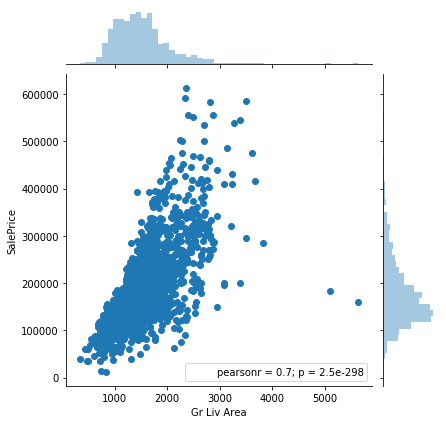

In [37]:
sns.jointplot(df_train['Gr Liv Area'], df_train['SalePrice'])

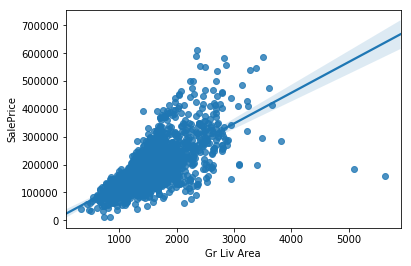

In [38]:
sns.regplot(df_train['Gr Liv Area'], df_train['SalePrice'])

In [39]:
#Before removing
print(df_train.shape)

(2051, 76)


In [40]:
outlier_index = df_train[(df_train['Gr Liv Area'] > 4000) & (df_train['SalePrice'] < 200000)].index

In [41]:
outlier_index

Int64Index([960, 1885], dtype='int64')

In [42]:
df_train.drop(outlier_index, axis=0, inplace=True)

In [43]:
#After removing
print(df_train.shape)

(2049, 76)


#### 2.3 Check for multicollinearity

In [44]:
#sns.pairplot(df_train[num_cols])

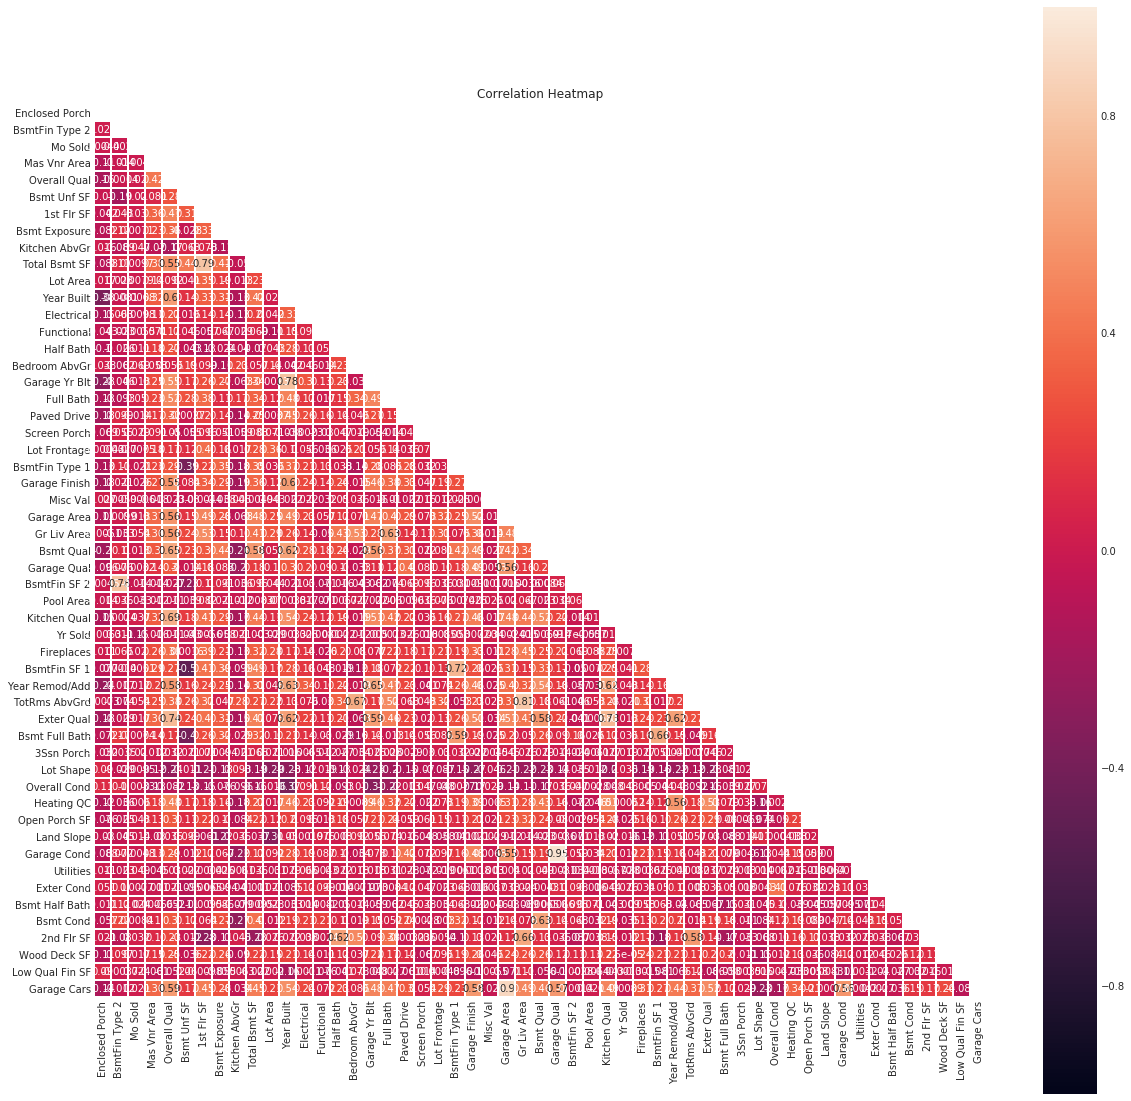

In [45]:
# Check if any variables are directly linearly correlated with other variables and should be dropped.
# Visualise correlation table in a heatmap with masked upper triangle

plt.figure(figsize=(20,20))
mask = np.zeros_like(df_train[num_cols].corr()) 
corr_ = df_train[num_cols].corr()

mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    sns.heatmap(corr_, mask = mask, annot = True, square = True, vmin = -1, vmax = 1, 
                linewidths = 1)
title = plt.title('Correlation Heatmap')

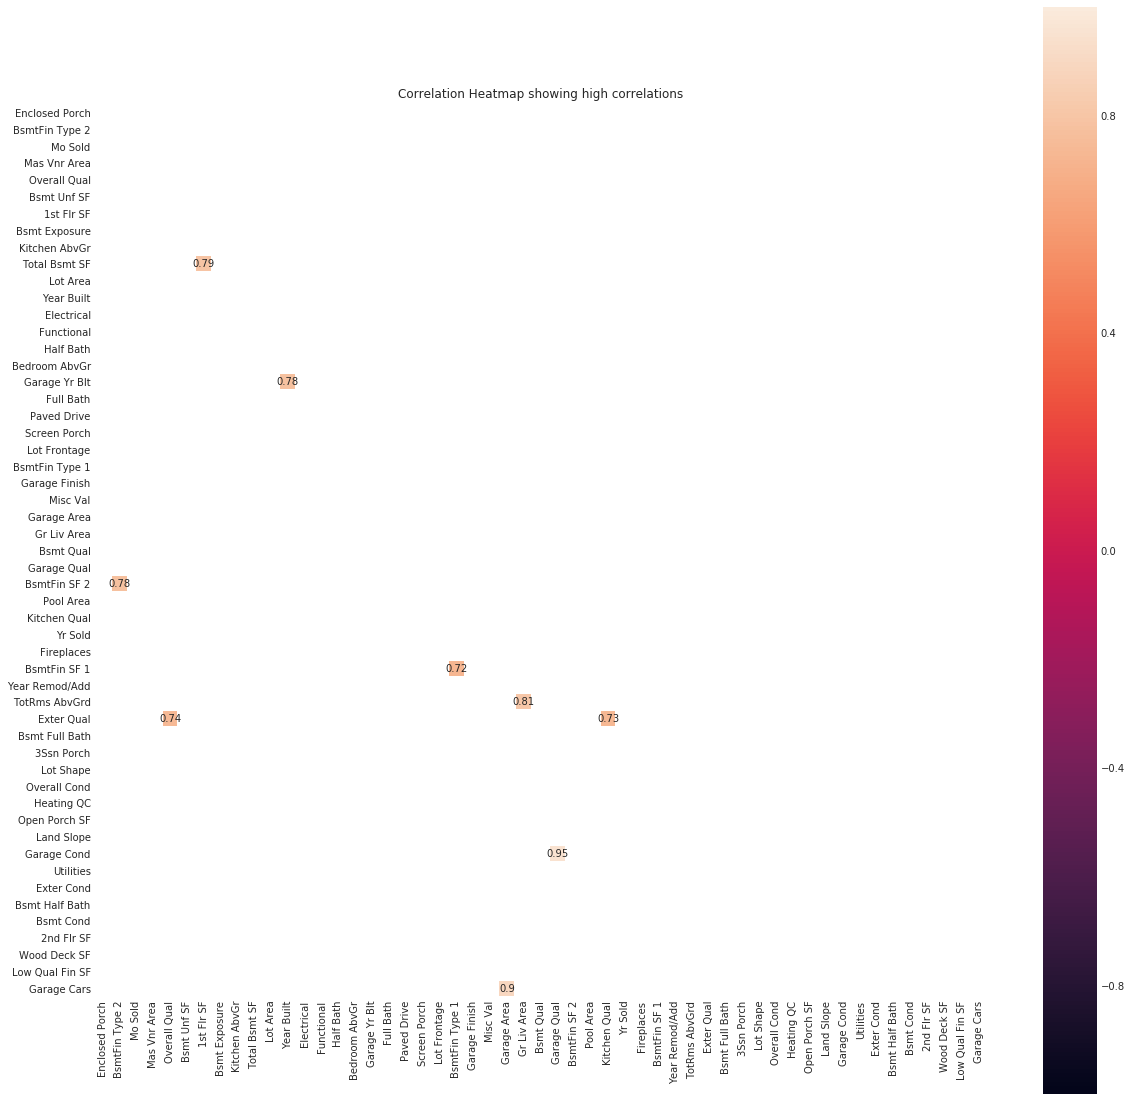

In [46]:
# We want to 'filter' only for those with the highest correlations

plt.figure(figsize=(20,20))
mask = np.zeros_like(df_train[num_cols].corr()) 
corr_ = df_train[num_cols].corr()
high_corr_ = corr_[abs(corr_) >= 0.7]

mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    sns.heatmap( high_corr_, mask = mask, annot = True, square = True, vmin = -1, vmax = 1, 
                linewidths = 1)
title = plt.title('Correlation Heatmap showing high correlations')

There is multicollinearity in our training data between the following data

- 'Garage Cars' and 'Garage Area' : Garage Area can be removed as Garage Cars is easier to visualise
- 'Garage Yr Blt' and 'Year Built' : The Garage and house are usually built in the same year, GarageYrBlt can be removed.
- '1st Flr SF' and 'Total Bsmt SF' : The 1st Flr SF and Total Bsmt SF can be combined (with the area of other floors) to form a new variable through feature engineering.
- 'Gr Liv Area' and 'TotRms AbvGrd' : TotRms AbvGrd can be removed as it has a lower correlation to SalePrice

In [47]:
#Before removing
print(df_train.shape)
print(df_test.shape)
list_vars_to_remove = ['Garage Area', 'Garage Yr Blt', 'TotRms AbvGrd']

(2049, 76)
(878, 75)


In [48]:
df_test.drop(labels = list_vars_to_remove, axis = 1, inplace = True, errors = 'raise')
df_train.drop(labels = list_vars_to_remove, axis = 1, inplace = True, errors = 'raise')

In [49]:
#After removing
print(df_train.shape)
print(df_test.shape)

(2049, 73)
(878, 72)


In [50]:
print(len(num_cols)) #before
num_cols = list(set(num_cols)- set(['Garage Area', 'Garage Yr Blt', 'TotRms AbvGrd']))
print(len(num_cols)) #after

53
50


In [51]:
#Before Adding new feature
print(df_train.shape)
print(df_test.shape)

(2049, 73)
(878, 72)


In [52]:
df_train['Total SqFeet'] = df_train['Total Bsmt SF'] + df_train['1st Flr SF'] + df_train['2nd Flr SF']
df_test['Total SqFeet'] = df_test['Total Bsmt SF'] + df_test['1st Flr SF'] + df_test['2nd Flr SF']
df_test.drop(labels = ['Total Bsmt SF', '1st Flr SF', '2nd Flr SF'], axis = 1, inplace = True, errors = 'raise')
df_train.drop(labels = ['Total Bsmt SF', '1st Flr SF', '2nd Flr SF'], axis = 1, inplace = True, errors = 'raise')

In [53]:
print(len(num_cols)) #before
num_cols = list(set(num_cols)- set(['Total Bsmt SF', '1st Flr SF', '2nd Flr SF']))
num_cols.append('Total SqFeet')
print(len(num_cols)) #after

50
48


In [54]:
#After Adding new feature and deleting 3 original features
print(df_train.shape)
print(df_test.shape)

(2049, 71)
(878, 70)


## Step 3. Exploratory Visualisations

In [55]:
top10corr = df_train.corr().SalePrice.sort_values(ascending=False)
top10corr.head(11) #included 11 because #1 is SalePrice for sure.

SalePrice         1.000000
Total SqFeet      0.829925
Overall Qual      0.803462
Gr Liv Area       0.719463
Exter Qual        0.715048
Kitchen Qual      0.694295
Garage Cars       0.648227
Bsmt Qual         0.613236
Year Built        0.572405
Garage Finish     0.558566
Year Remod/Add    0.550872
Name: SalePrice, dtype: float64

In [56]:
neg_corr = df_train.corr().SalePrice.sort_values(ascending=True)
neg_corr.head(13)

Lot Shape         -0.296743
PID               -0.255068
Enclosed Porch    -0.135713
Kitchen AbvGr     -0.125472
Overall Cond      -0.097093
Land Slope        -0.057967
Id                -0.051416
Bsmt Half Bath    -0.045534
Low Qual Fin SF   -0.041608
Yr Sold           -0.015174
Misc Val          -0.010323
BsmtFin Type 2     0.014037
BsmtFin SF 2       0.016398
Name: SalePrice, dtype: float64

The top variables that are correlated with SalePrice are:
1. Total SqFeet : Feature that was just added
2. Overall Qual : Rates the overall material and finish of the house (10 for Very Excellent, and 1 for Very Poor)
3. Gr Liv Area : Above grade (ground) living area square feet
4. Exter Qual
5. Kitchen Qual
6. Garage Cars
7. Bsmt Qual
8. Year Built
9. Year Remod/Add

The variables with negative correlation with SalePrice (excluding PID, MS SubClass and ID as they have no numerical meaning)
- Lot Shape (Ordinal) - General shape of property (score 4 for Regular, 0 for Irregular)
- Enclosed Porch - area in sq feet
- Kitchen AbvGr - Kitchens above grad
- Overall Cond - Rates the overall condition of the house (10 for Very Excellent, and 1 for Very Poor)
- Land Slope
- Bsmt Half Bath
- Low Qual Fin SF
- Yr Sold - Year Sold (YYYY)
- Misc Val

(Intentionally ignore PID and ID as they are identifiers, and MS SubClass as it should be a categorical variable)

Comments: The Overall Cond having such a low correlation with SalePrice is counterintuitive, especially since it is similar in meaning compared with Overall Qual.  

Ordinal data with negative correlation should be because there are a lot of houses missing that feature, as it does not make intuitive sense that a higher rating score for the feature 


#### 3.2 Visualisations for Numerical values

##### 3.2.2 Overall Qual

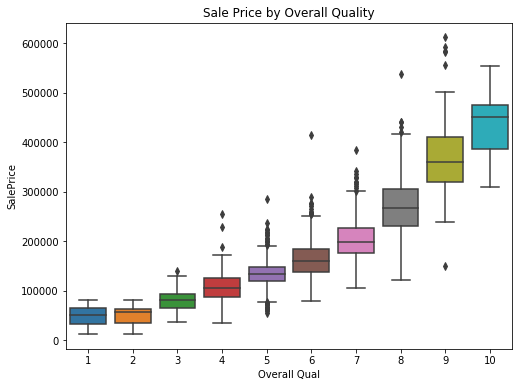

In [57]:
#As Overall Qual is ordinal data, to plot a boxplot instead of scatter plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Overall Qual', y='SalePrice', data= df_train) 
title = plt.title('Sale Price by Overall Quality')

##### 3.2.3 Gr Liv Area

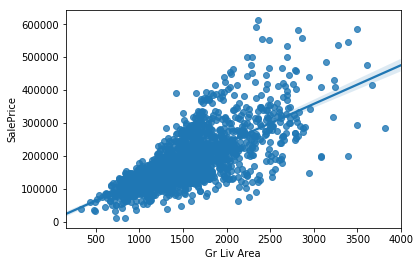

In [58]:
#Plot a graph of Gr Liv Area against SalePrice (y variable)
sns.regplot(df_train['Gr Liv Area'], df_train['SalePrice'])

##### 3.2.1 Total SqFeet

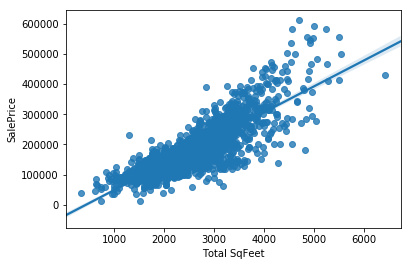

In [118]:
#Plot a graph of Total SqFeet against SalePrice (y variable)
sns.regplot(df_train['Total SqFeet'], df_train['SalePrice'])

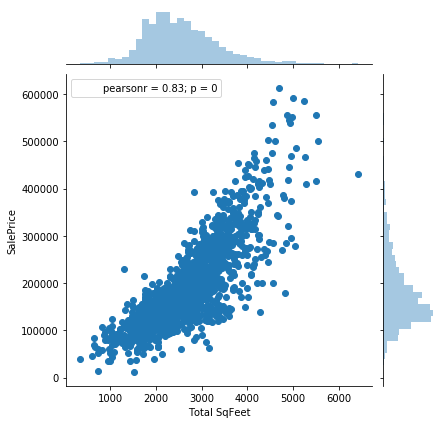

In [119]:
sns.jointplot(df_train['Total SqFeet'], df_train['SalePrice'])

##### 3.2.4 Exter Qual/ Kitchen Qual / Bsmt Qual/ Garage Cars

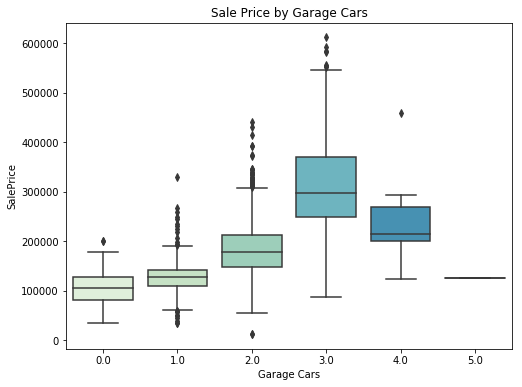

In [60]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Garage Cars', y='SalePrice', data= df_train, palette='GnBu')
title = plt.title('Sale Price by Garage Cars')

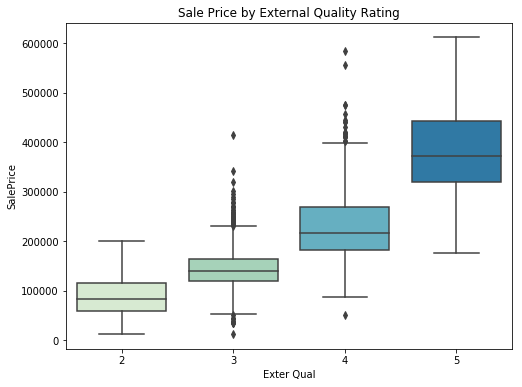

In [61]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Exter Qual', y='SalePrice', data= df_train, palette='GnBu')
title = plt.title('Sale Price by External Quality Rating')

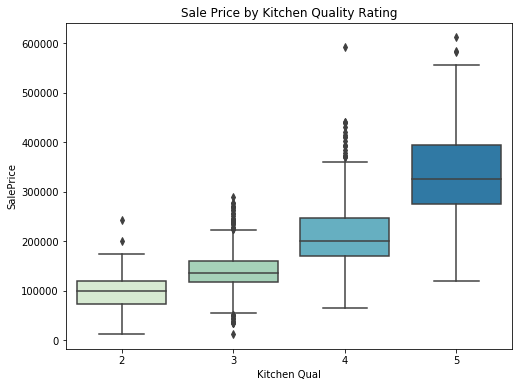

In [62]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Kitchen Qual', y='SalePrice', data= df_train, palette='GnBu')
title = plt.title('Sale Price by Kitchen Quality Rating')

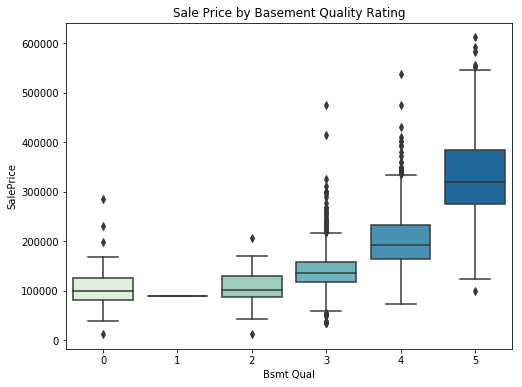

In [63]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Bsmt Qual', y='SalePrice', data= df_train, palette='GnBu')
title = plt.title('Sale Price by Basement Quality Rating')

##### 3.4.5 Year Built, Year Remod/Add

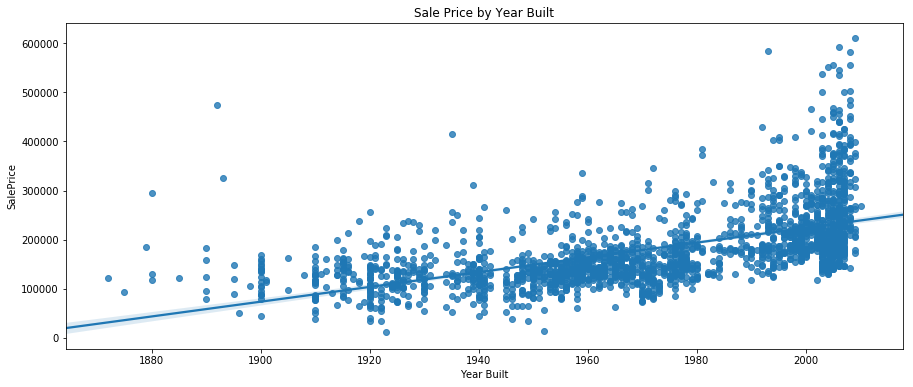

In [64]:
plt.figure(figsize=(15, 6))

sns.regplot(x= df_train['Year Built'], y= df_train['SalePrice'], fit_reg=True);

title = plt.title('Sale Price by Year Built')

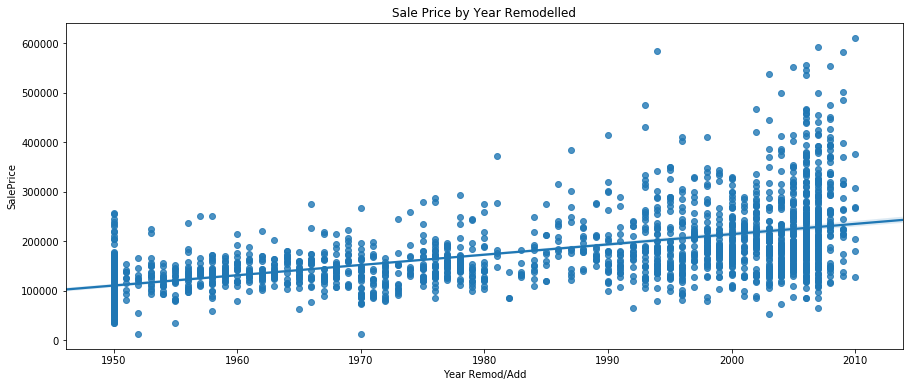

In [65]:
plt.figure(figsize=(15, 6))

sns.regplot(x= df_train['Year Remod/Add'], y= df_train['SalePrice'], fit_reg=True);

title = plt.title('Sale Price by Year Remodelled')


### 3.3 Visualisations for Categorical values

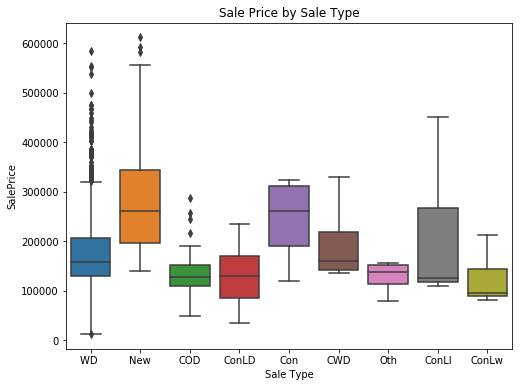

In [66]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Sale Type', y='SalePrice', data= df_train)
title = plt.title('Sale Price by Sale Type')

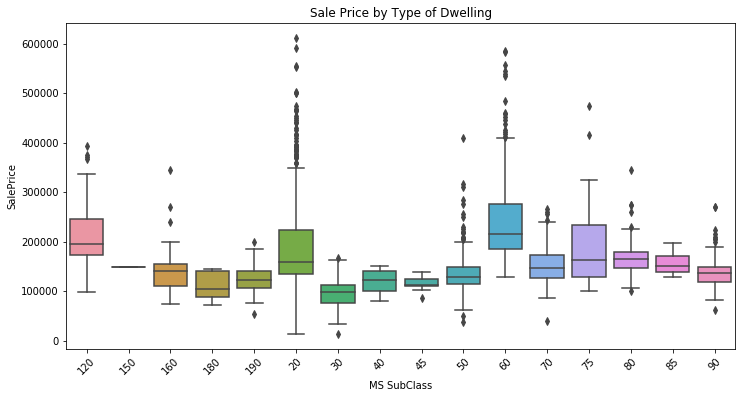

In [67]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='MS SubClass', y='SalePrice', data= df_train)
title = plt.title('Sale Price by Type of Dwelling')
tick = plt.xticks(rotation=45)

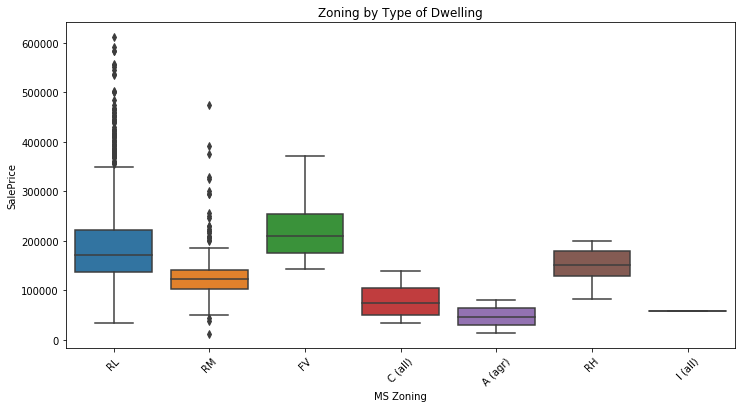

In [68]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='MS Zoning', y='SalePrice', data= df_train)
title = plt.title('Zoning by Type of Dwelling')
tick = plt.xticks(rotation=45)

Comments: The mean sale prices of FV (Floating Village Residential) is highest, followed by 
Residential Low Density (RL), 
Residential High Density (RH),
Residential Medium Density (RM).

The lowest mean sale prices are from the Agriculture (A) zone.

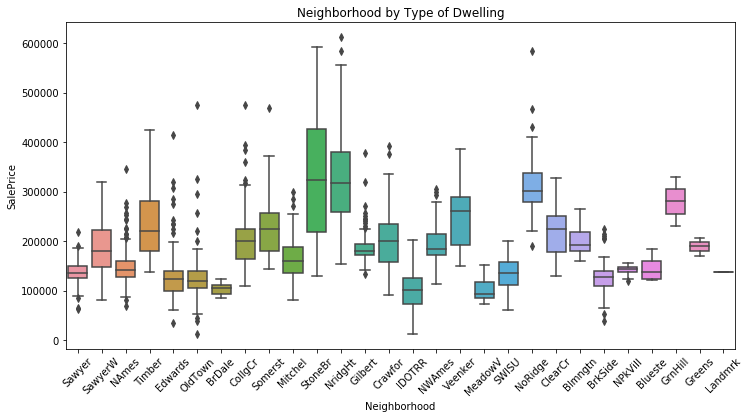

In [69]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Neighborhood', y='SalePrice', data= df_train)
title = plt.title('Neighborhood by Type of Dwelling')
tick = plt.xticks(rotation=45)


# Step 4. Pre-processing


- One-hot encode categorical variables.
- Train/test split your data.
- Scale your data.
- Consider using automated feature selection. (skip)

In [70]:
#Create a function called rmse because we are evaluating based on this
def rmse(x, y):
    return np.sqrt(((x - y) ** 2).mean())

###### Remember to process both df_train and df_test at the same time!

### 4.1 One-hot encoding categorical variables

train dataset

In [71]:
#Before one-hot encoding
df_train.shape

(2049, 71)

In [72]:
df_train_dummies = pd.get_dummies(df_train, drop_first=True)

In [73]:
#After one-hot encoding
df_train_dummies.shape

(2049, 198)

test dataset

In [74]:
#Before one-hot encoding
df_test.shape

(878, 70)

In [75]:
df_test_dummies = pd.get_dummies(df_test, drop_first=True)

In [76]:
#After one-hot encoding
df_test_dummies.shape

(878, 189)

There are some differences in the number of columns in df_test and df_train after one-hot encoding. Rectify it.

In [77]:
train_cols = df_train_dummies.columns
test_cols = df_test_dummies.columns

common_cols = train_cols.intersection(test_cols)
train_not_test = train_cols.difference(test_cols)

train_not_test

Index(['Condition 2_Feedr', 'Condition 2_PosN', 'Condition 2_RRAe',
       'Condition 2_RRAn', 'Condition 2_RRNn', 'Exterior 1st_CBlock',
       'Exterior 1st_ImStucc', 'Exterior 1st_Stone', 'Exterior 2nd_Stone',
       'Heating_OthW', 'Heating_Wall', 'MS SubClass_150', 'MS Zoning_C (all)',
       'Neighborhood_GrnHill', 'Neighborhood_Landmrk', 'Roof Matl_Membran',
       'SalePrice'],
      dtype='object')

In [78]:
test_not_train = test_cols.difference(train_cols)
test_not_train

Index(['Exterior 1st_PreCast', 'Exterior 2nd_Other', 'Exterior 2nd_PreCast',
       'Heating_GasA', 'Mas Vnr Type_CBlock', 'Roof Matl_Metal',
       'Roof Matl_Roll', 'Sale Type_VWD'],
      dtype='object')

In [79]:
print(len(train_not_test))
print(len(test_not_train))

17
8


In [80]:
#for x in test_not_train:
#    df_train_dummies[x] = 0
    
for y in train_not_test:
    df_test_dummies[y] = 0 #Also created a column of SalePrice = 0 here.

#No point creating a lot of columns of 0 as we will be creating a lot of collinear variables in the train dataset.

In [81]:
#list(test_not_train) #drop this from the df_test_dummies dataset

df_test_dummies.drop(labels = list(test_not_train), axis = 1, inplace = True, errors = 'raise')

In [82]:
print(len(df_train_dummies.columns))
print(len(df_test_dummies.columns))
#Check that there are equal number of columns now
print(len(df_train_dummies.columns) == len(df_test_dummies.columns))

198
198
True


In [83]:
#df_train = df_train_dummies
#df_test = df_test_dummies

### 4.2 Train/Test split

In [84]:
#train-test split data
y_train = df_train_dummies['SalePrice']

X_train = df_train_dummies.drop(labels = 'SalePrice', axis = 1, inplace = False, errors = 'raise')

print(y_train.shape)
print(X_train.shape)

(2049,)
(2049, 197)


In [85]:
X_test = df_test_dummies['SalePrice']

df_test_dummies.drop(labels = 'SalePrice', axis = 1, inplace = True, errors = 'raise')

### 4.3 Scale data using StandardScalar

In [102]:
from sklearn.preprocessing import StandardScaler, RobustScaler

ss = StandardScaler()


In [103]:
rs = RobustScaler()
Xr = rs.fit_transform(X_train)

In [87]:
Xs = ss.fit_transform(X_train)

# Step 5. Modelling

#### 5.1 Fit a Linear Regression model in `statsmodels` predicting `SalePrice`. 

In [120]:
#Import

import statsmodels.api as sm

from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import cross_val_score #train_test_split

#from sklearn.metrics import mean_squared_error

In [ ]:
X_train_sub = X_train[[]]

In [89]:
lr = LinearRegression()

lr.fit(X_train, y_train)

#lr.score(X_test, y_test) #cannot score as we are not given y_test

lr_scores = cross_val_score(lr, Xs, y_train, cv= 5) #Use scaled Xs instead of X_train

print (lr_scores)
print (np.mean(lr_scores))

[ 8.86210472e-01 -3.40115340e+24 -1.64714208e+18 -3.41314741e+22
 -1.19184337e+15]
-6.870573042480003e+23


In [116]:
# Remember, we need to add a constant in statsmodels!
X_train = sm.add_constant(X_train)

# Is this relevant to what we are doing?

In [117]:
model_sm = sm.OLS(y_train, X_train).fit()
model_sm.summary() # R square and adjusted R square both give very high values (>0.9)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     127.3
Date:                Thu, 27 Oct 2022   Prob (F-statistic):               0.00
Time:                        21:23:05   Log-Likelihood:                -23289.
No. Observations:                2049   AIC:                         4.697e+04
Df Residuals:                    1853   BIC:                         4.807e+04
Df Model:                         195                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  8.75e+06   9.49e+06      0.922      0.357   -9.87e+06    2.74e+07
Id                      -7.1575      7.498     -0.955      0.340     -21.863       7.548
PID                   6.427e-06   9.29e-06      0.692      0.489   -1.18e-05    2.46e-05
Lot Frontage           118.9001     36.824      3.229      0.001      46.680     191.120
Lot Area                 0.6458      0.109      5.940      0.000       0.433       0.859
Lot Shape             1279.6197   1091.462      1.172      0.241    -861.005    3420.244
Utilities             2.602e+04    1.3e+04      1.995      0.046     441.976    5.16e+04
Land Slope            2687.1885   2786.523      0.964      0.335   -2777.865    8152.242
Overall Qual          7770.0012    788.818      9.850      0.000    6222.935    9317.067
Overall Cond          5358.5353    673.240      7.959      0.000    4038.147    6678.924
Year Built             330.9799     63.400      5.220      0.000     206.636     455.323
Year Remod/Add          31.0611     43.485      0.714      0.475     -54.223     116.345
Mas Vnr Area            36.8157      4.756      7.742      0.000      27.489      46.142
Exter Qual            8450.1686   1659.513      5.092      0.000    5195.458    1.17e+04
Exter Cond           -1697.2344   1602.300     -1.059      0.290   -4839.738    1445.269
Bsmt Qual             2270.6806   1279.392      1.775      0.076    -238.520    4779.881
Bsmt Cond            -3720.6509   1545.619     -2.407      0.016   -6751.988    -689.314
Bsmt Exposure         4024.4886    666.853      6.035      0.000    2716.627    5332.350
BsmtFin Type 1        -289.2129    403.203     -0.717      0.473   -1079.993     501.567
BsmtFin SF 1            12.5341      3.064      4.091      0.000       6.525      18.544
BsmtFin Type 2         519.2810    903.354      0.575      0.565   -1252.417    2290.979
BsmtFin SF 2            -3.0893      4.941     -0.625      0.532     -12.780       6.602
Bsmt Unf SF             -9.9730      2.781     -3.586      0.000     -15.427      -4.519
Heating QC            1336.9771    744.389      1.796      0.073    -122.952    2796.906
Electrical           -1661.8406   1504.432     -1.105      0.269   -4612.401    1288.720
Low Qual Fin SF          5.8182      9.483      0.614      0.540     -12.779      24.416
Gr Liv Area             31.5342      3.786      8.328      0.000      24.108      38.960
Bsmt Full Bath        3076.0038   1500.454      2.050      0.041     133.245    6018.763
Bsmt Half Bath         858.1988   2243.595      0.383      0.702   -3542.041    5258.439
Full Bath             1171.2192   1652.001      0.709      0.478   -2068.759    4411.197
Half Bath             2565.3999   1605.639      1.598      0.110    -583.652    5714.452
Bedroom AbvGr        -3439.9595    958.057     -3.591    

In [107]:
model_sm = sm.OLS(y_train, Xs).fit()
model_sm.summary() #This R squared is so low
#X contains an outlier that causes the standard scaler to be so low compared to the one that is not scaled thru ss.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     1.666
Date:                Thu, 27 Oct 2022   Prob (F-statistic):           1.21e-07
Time:                        20:04:28   Log-Likelihood:                -27732.
No. Observations:                2049   AIC:                         5.585e+04
Df Residuals:                    1854   BIC:                         5.695e+04
Df Model:                         195                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -6041.2398   5.53e+04     -0.109      0.913   -1.15e+05    1.02e+05
x2          1212.4181   1.53e+04      0.079      0.937   -2.88e+04    3.13e+04
x3          2446.6330   6622.841      0.369      0.712   -1.05e+04    1.54e+04
x4          4266.5574   6277.703      0.680      0.497   -8045.552    1.66e+04
x5           721.1777   5376.514      0.134      0.893   -9823.481    1.13e+04
x6          1284.8584   5628.780      0.228      0.819   -9754.555    1.23e+04
x7           656.5286   5950.436      0.110      0.912    -1.1e+04    1.23e+04
x8          1.104e+04   9800.182      1.127      0.260   -8176.016    3.03e+04
x9          5919.1826   6500.042      0.911      0.363   -6828.989    1.87e+04
x10         9983.6553   1.67e+04      0.597      0.550   -2.28e+04    4.28e+04
x11          653.1420   7992.035      0.082      0.935    -1.5e+04    1.63e+04
x12         6328.4191   7144.818      0.886      0.376   -7684.316    2.03e+04
x13         4951.7230   8499.674      0.583      0.560   -1.17e+04    2.16e+04
x14         -632.8542   5221.995     -0.121      0.904   -1.09e+04    9608.755
x15         2045.0222   1.01e+04      0.203      0.839   -1.77e+04    2.18e+04
x16        -2128.7502   7729.277     -0.275      0.783   -1.73e+04     1.3e+04
x17         4335.0038   6278.261      0.690      0.490   -7978.201    1.66e+04
x18         -614.5045   7487.931     -0.082      0.935   -1.53e+04    1.41e+04
x19         7978.6770   9945.722      0.802      0.423   -1.15e+04    2.75e+04
x20          493.1947   7499.018      0.066      0.948   -1.42e+04    1.52e+04
x21          415.9328   7834.438      0.053      0.958   -1.49e+04    1.58e+04
x22        -1941.3779   8669.059     -0.224      0.823   -1.89e+04    1.51e+04
x23         1288.8309   6271.949      0.205      0.837    -1.1e+04    1.36e+04
x24         -668.9886   5293.376     -0.126      0.899   -1.11e+04    9712.615
x25           10.6261   5029.866      0.002      0.998   -9854.170    9875.423
x26         1.804e+04   1.23e+04      1.469      0.142   -6047.680    4.21e+04
x27         1603.8447   6837.998      0.235      0.815   -1.18e+04     1.5e+04
x28          215.2321   4918.067      0.044      0.965   -9430.300    9860.764
x29          643.2975   7930.756      0.081      0.935   -1.49e+04    1.62e+04
x30         1284.6988   7027.890      0.183      0.855   -1.25e+04    1.51e+04
x31        -2843.4799   6921.800     -0.411      0.681   -1.64e+04    1.07e+04
x32        -1424.0315   9174.183     -0.155      0.877   -1.94e+04    1.66e+04
x33         4341.5690   7434.544      0.584      0.559   -1.02e+04    1.89e+04
x34         3794.2392   5082.294      0.747      0.455   -6173.382    1.38e+04
x35         1398.9211   5935.173      0.236      0.814   -1.02e+04     1.3e+04
x36          433.1554   7371.699      0.059      0.953    -1.4e+04    1.49e+04
x3

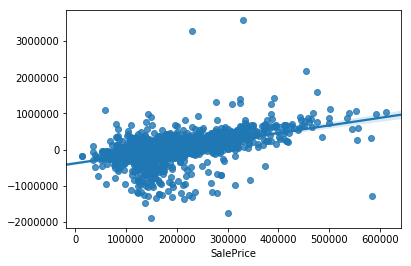

In [106]:
sns.regplot(y_train, model_sm.predict(Xs))

### 5.1 Ridge Regression

#### Find an optimal value for Ridge regression alpha using `RidgeCV`.

In [93]:
%%time
ridge_alphas = np.logspace(0, 5, 200) # Ridge performs best searching alphas through logarithmic space instead of linear space

optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(Xs, y_train)

print(optimal_ridge.alpha_)

128.98902612533095
Wall time: 1min 3s


#### Cross-validate the Ridge regression $R^2$ with the optimal alpha. Is it better than the Linear regression? If so, why might this be?

In [110]:
ridge = Ridge(alpha=optimal_ridge.alpha_)

ridge_scores = cross_val_score(ridge, Xs, y_train, cv=10)

print (ridge_scores)
print (np.mean(ridge_scores))

[0.88483109 0.90249655 0.90884389 0.93023632 0.92980486 0.91657092
 0.91200856 0.91059507 0.89347089 0.9181275 ]
0.9106985657326468


In [111]:
ridge = Ridge(alpha=optimal_ridge.alpha_)

ridge_scores = cross_val_score(ridge, Xr, y_train, cv=10)

print (ridge_scores)
print (np.mean(ridge_scores))

[0.87172751 0.89975227 0.88267173 0.92275377 0.91915799 0.90595493
 0.91995928 0.90065247 0.89158861 0.90602979]
0.902024836060137


### 5.2 Lasso Regression

In [95]:
optimal_lasso = LassoCV(n_alphas=500, cv=10, verbose=1)
optimal_lasso.fit(Xs, y_train)

print (optimal_lasso.alpha_)

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

277.6094039082967


Cross-validate the Lasso $R^2$ with the optimal alpha.

Is it better than the Linear regression? Is it better than Ridge? What do the differences in results imply about the issues with the dataset?

In [96]:
lasso = Lasso(alpha=optimal_lasso.alpha_)

lasso_scores = cross_val_score(lasso, Xs, y_train, cv=10)

print (lasso_scores)
print (np.mean(lasso_scores))

[0.88015403 0.90166575 0.90827741 0.93323391 0.93181929 0.91802001
 0.91749116 0.9116175  0.89587593 0.92048876]
0.911864374406185


coefficients for variables in the Lasso.

1. Show the coefficient for variables, ordered from largest to smallest coefficient by absolute value.
2. What percent of the variables in the original dataset are "zeroed-out" by the lasso?
3. What are the most important predictors for how many shots Kobe made in a game?

> **Note:** if you only fit the Lasso within `cross_val_score`, you will have to refit it outside of that
function to pull out the coefficients.

#### Look at the coefficients for variables in the Lasso.

In [97]:
lasso.fit(Xs, y_train)

Lasso(alpha=277.6094039082967, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [98]:
lasso_coefs = pd.DataFrame({'variable':X_train.columns,
                            'coef':lasso.coef_,
                            'abs_coef':np.abs(lasso.coef_)})

lasso_coefs.sort_values('abs_coef', inplace=True, ascending=False)

lasso_coefs.head(20)

,abs_coef,coef,variable
25,18400.749726,18400.749726,Gr Liv Area
49,13312.755982,13312.755982,Total SqFeet
7,11879.953351,11879.953351,Overall Qual
18,9436.831224,9436.831224,BsmtFin SF 1
97,7583.646237,7583.646237,Neighborhood_NridgHt
9,7400.742416,7400.742416,Year Built
103,5785.549120,5785.549120,Neighborhood_StoneBr
11,5737.275346,5737.275346,Mas Vnr Area
12,5394.817898,5394.817898,Exter Qual
8,5169.039174,5169.039174,Overall Cond


In [99]:
print ('Percent variables zeroed out:', np.sum((lasso.coef_ == 0))/float(X_train.shape[0]))

Percent variables zeroed out: 0.03318692044899951


In [ ]:
#Model performance

rmse()

Comment on performance:
    
    Which model we choose as our final model:

# Step 6. Inferential Visualizations

- Look at feature loadings.
- Look at how accurate your predictions are.
- Is there a pattern to your errors? Consider reworking your model to address this.

##### Compare the residuals for the Ridge and Lasso visually.

In [ ]:
# Need to fit the ElasticNet and Ridge outside of cross_val_score like i did with the ridge
ridge.fit(Xs, y_train)
lasso.fit(Xs, y_train)

In [ ]:
# model residuals:

ridge_resid = y_train - ridge.predict(Xs)
lasso_resid = y_train - lasso.predict(Xs)

In [ ]:
sns.jointplot(ridge_resid, lasso_resid)

# Step 7. Conclusions and Recommendations

- Which features appear to add the most value to a home?
- Which features hurt the value of a home the most?
- What are things that homeowners could improve in their homes to increase the value?
- What neighborhoods seem like they might be a good investment?
- Do you feel that this model will generalize to other cities? How could you revise your model to make it more universal OR what date would you need from another city to make a comparable model?